<a href="https://colab.research.google.com/github/omj3424/Machine_Learning_Study/blob/main/7_%EB%82%98%EC%9D%B4%EB%B8%8C_%EB%B2%A0%EC%9D%B4%EC%A6%88_%EB%B6%84%EB%A5%98%EA%B8%B0(Naive_Bayes_Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##나이브 베이즈 분류기(Naive Bayes Classification)
* 베이즈 정리를 적용한 확률적 분류 알고리즘
* 모든 특성들이 독립임을 가정(naive 가정)
* 입력 특성에 따라 3개의 분류기 존재
 + 가우시안 나이브 베이즈 분류기
 + 베르누이 나이브 베이즈 분류기
 + 다항 나이브 베이즈 분류기

## 나이브 베이즈 분류기의 확률 모델


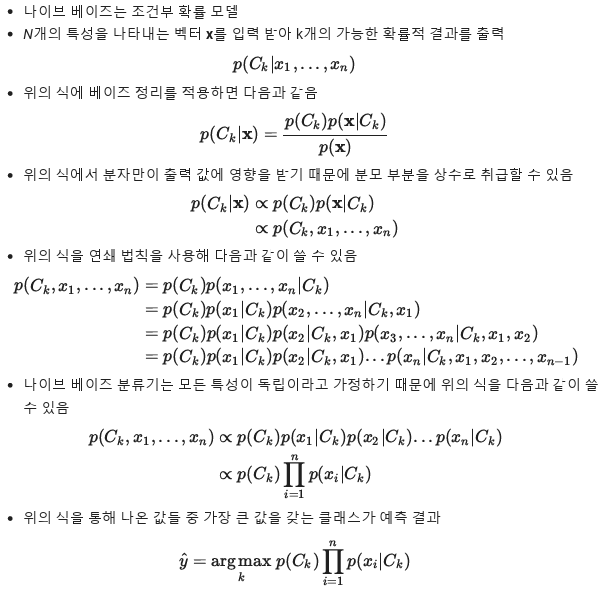

In [1]:
import numpy as np
import pandas as pd

from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.datasets import fetch_covtype, fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer
from sklearn import metrics

In [3]:
prior = [0.45, 0.3, 0.15, 0.1]
likelihood = [[0.3, 0.3, 0.4], [0.7, 0.2, 0.1], [0.15, 0.5, 0.35], [0.6, 0.2, 0.2]]

idx = 0
for c, xs in zip(prior, likelihood):
  result = 1.

  for x in xs:
    result *= x
  result *= c

  idx += 1
  print(f"{idx}번째 클래스의 가능성: {result}")

1번째 클래스의 가능성: 0.0162
2번째 클래스의 가능성: 0.0042
3번째 클래스의 가능성: 0.0039375
4번째 클래스의 가능성: 0.0024000000000000002


## 산림 토양 데이터
* 산림 지역 토양의 특징 데이터
* 토양이 어떤 종류에 속하는지 예측

In [4]:
covtype = fetch_covtype()
print(covtype.DESCR)

.. _covtype_dataset:

Forest covertypes
-----------------

The samples in this dataset correspond to 30×30m patches of forest in the US,
collected for the task of predicting each patch's cover type,
i.e. the dominant species of tree.
There are seven covertypes, making this a multiclass classification problem.
Each sample has 54 features, described on the
`dataset's homepage <https://archive.ics.uci.edu/ml/datasets/Covertype>`__.
Some of the features are boolean indicators,
while others are discrete or continuous measurements.

**Data Set Characteristics:**

=================   ============
Classes                        7
Samples total             581012
Dimensionality                54
Features                     int
=================   ============

:func:`sklearn.datasets.fetch_covtype` will load the covertype dataset;
it returns a dictionary-like 'Bunch' object
with the feature matrix in the ``data`` member
and the target values in ``target``. If optional argument 'as_frame' is
se

In [5]:
pd.DataFrame(covtype.data)

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,837.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581008,2391.0,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,845.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581009,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,854.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581010,2384.0,170.0,15.0,60.0,5.0,90.0,230.0,245.0,143.0,864.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
covtype.target

array([5, 5, 2, ..., 3, 3, 3], dtype=int32)

### 학습, 평가 데이터 분류

In [8]:
covtype_X = covtype.data
covtype_y = covtype.target

In [10]:
covtype_X_train, covtype_X_test, covtype_y_train, covtype_y_test = train_test_split(covtype_X, covtype_y, test_size=0.2)

In [11]:
print('전체 데이터 크기: {}'.format(covtype_X.shape))
print('학습 데이터 크기: {}'.format(covtype_X_train.shape))
print('평가 데이터 크기: {}'.format(covtype_X_test.shape))

전체 데이터 크기: (581012, 54)
학습 데이터 크기: (464809, 54)
평가 데이터 크기: (116203, 54)


## 전처리

### 전처리 전 데이터

In [12]:
covtype_df = pd.DataFrame(data=covtype_X)
covtype_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
covtype_train_df = pd.DataFrame(data=covtype_X_train)
covtype_train_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
count,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,...,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000
mean,2959.080291,155.588177,14.102242,269.167792,46.407589,2349.355256,212.175760,223.309639,142.484298,1981.055715,...,0.044042,0.090420,0.077752,0.002788,0.003259,0.000215,0.000514,0.026774,0.023636,0.014933
std,280.012958,111.900978,7.487804,212.314218,58.248138,1560.421292,26.744702,19.787872,38.267107,1324.910967,...,0.205188,0.286783,0.267782,0.052730,0.056998,0.014666,0.022670,0.161424,0.151911,0.121285
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1103.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1994.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3330.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 전처리 과정

In [14]:
scaler = StandardScaler()
covtype_X_train_scale = scaler.fit_transform(covtype_X_train)
covtype_X_test_scale = scaler.fit_transform(covtype_X_test)

### 전처리 후 데이터
* 평균은 0에 가깝게, 표준편차는 1에 가깝게 정규화

In [15]:
covtype_train_df = pd.DataFrame(data=covtype_X_train_scale)
covtype_train_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
count,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,...,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05
mean,-3.857463e-16,-8.477277e-17,8.411162e-17,-1.984222e-17,-2.875441e-17,-1.156826e-16,3.833921e-17,6.167217e-16,-1.164240e-16,-3.676468e-17,...,1.008239e-16,-8.010266e-18,4.870364e-17,-2.048427e-17,2.234925e-17,7.146564e-18,1.559250e-17,2.348048e-17,4.526412e-17,-2.488686e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-3.928681e+00,-1.390411e+00,-1.883363e+00,-1.267782e+00,-3.766778e+00,-1.505592e+00,-7.933384e+00,-1.128519e+01,-3.723418e+00,-1.495238e+00,...,-2.146411e-01,-3.152910e-01,-2.903575e-01,-5.287758e-02,-5.718445e-02,-1.466930e-02,-2.268158e-02,-1.658645e-01,-1.555882e-01,-1.231235e-01
25%,-5.359768e-01,-8.720950e-01,-6.814077e-01,-7.591011e-01,-6.765475e-01,-7.987308e-01,-5.300405e-01,-5.210085e-01,-6.136948e-01,-7.223555e-01,...,-2.146411e-01,-3.152910e-01,-2.903575e-01,-5.287758e-02,-5.718445e-02,-1.466930e-02,-2.268158e-02,-1.658645e-01,-1.555882e-01,-1.231235e-01
50%,1.318501e-01,-2.554777e-01,-1.472051e-01,-2.410006e-01,-2.816847e-01,-2.277306e-01,2.177719e-01,1.359602e-01,1.347640e-02,-2.045843e-01,...,-2.146411e-01,-3.152910e-01,-2.903575e-01,-5.287758e-02,-5.718445e-02,-1.466930e-02,-2.268158e-02,-1.658645e-01,-1.555882e-01,-1.231235e-01
75%,7.282518e-01,9.330744e-01,5.205481e-01,5.408603e-01,3.878654e-01,6.284494e-01,7.038500e-01,6.918569e-01,6.667797e-01,4.294212e-01,...,-2.146411e-01,-3.152910e-01,-2.903575e-01,-5.287758e-02,-5.718445e-02,-1.466930e-02,-2.268158e-02,-1.658645e-01,-1.555882e-01,-1.231235e-01
max,3.210282e+00,1.826723e+00,6.930979e+00,5.312096e+00,9.521214e+00,3.055361e+00,1.563834e+00,1.550970e+00,2.914143e+00,3.918716e+00,...,4.658941e+00,3.171673e+00,3.444030e+00,1.891161e+01,1.748727e+01,6.816957e+01,4.408863e+01,6.029018e+00,6.427224e+00,8.121928e+00


In [16]:
covtype_test_df = pd.DataFrame(data=covtype_X_test_scale)
covtype_test_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
count,1.162030e+05,1.162030e+05,1.162030e+05,1.162030e+05,1.162030e+05,1.162030e+05,1.162030e+05,1.162030e+05,1.162030e+05,1.162030e+05,...,1.162030e+05,1.162030e+05,1.162030e+05,1.162030e+05,1.162030e+05,1.162030e+05,1.162030e+05,1.162030e+05,1.162030e+05,1.162030e+05
mean,-6.807460e-16,4.320013e-17,9.465506e-17,-7.196964e-17,2.684339e-17,1.478221e-17,3.497590e-17,3.393029e-16,2.513128e-16,-6.542694e-17,...,-3.807909e-17,3.876699e-17,-4.005107e-18,1.235163e-17,-2.042299e-17,2.109560e-18,-8.438241e-18,-6.065750e-17,1.589814e-18,-3.323322e-17
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,...,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-3.892913e+00,-1.392688e+00,-1.883788e+00,-1.266932e+00,-3.479015e+00,-1.513796e+00,-7.890832e+00,-7.381512e+00,-3.725596e+00,-1.496403e+00,...,-2.163294e-01,-3.150259e-01,-2.899904e-01,-5.213580e-02,-5.697561e-02,-1.278803e-02,-2.253864e-02,-1.663221e-01,-1.577069e-01,-1.257528e-01
25%,-5.341977e-01,-8.746660e-01,-6.821839e-01,-7.610397e-01,-6.747907e-01,-7.978456e-01,-5.220382e-01,-5.258555e-01,-6.188468e-01,-7.229365e-01,...,-2.163294e-01,-3.150259e-01,-2.899904e-01,-5.213580e-02,-5.697561e-02,-1.278803e-02,-2.253864e-02,-1.663221e-01,-1.577069e-01,-1.257528e-01
50%,1.268261e-01,-2.583979e-01,-1.481377e-01,-1.989371e-01,-2.986143e-01,-2.253424e-01,2.222844e-01,1.343188e-01,7.724548e-03,-2.045171e-01,...,-2.163294e-01,-3.150259e-01,-2.899904e-01,-5.213580e-02,-5.697561e-02,-1.278803e-02,-2.253864e-02,-1.663221e-01,-1.577069e-01,-1.257528e-01
75%,7.271071e-01,9.384126e-01,5.194201e-01,5.599015e-01,3.853427e-01,6.211904e-01,7.060941e-01,6.929278e-01,6.865101e-01,4.319658e-01,...,-2.163294e-01,-3.150259e-01,-2.899904e-01,-5.213580e-02,-5.697561e-02,-1.278803e-02,-2.253864e-02,-1.663221e-01,-1.577069e-01,-1.257528e-01
max,3.203266e+00,1.822623e+00,6.260417e+00,5.244090e+00,9.447774e+00,3.041785e+00,1.562065e+00,1.556233e+00,2.905617e+00,3.907268e+00,...,4.622579e+00,3.174342e+00,3.448390e+00,1.918068e+01,1.755137e+01,7.819813e+01,4.436826e+01,6.012429e+00,6.340878e+00,7.952109e+00


## 가우시안 나이브 베이즈
* 입력 특성이 가우시안(정규) 분포를 갖는다고 가정

In [17]:
model = GaussianNB()
model.fit(covtype_X_train_scale, covtype_y_train)

GaussianNB()

In [19]:
predict = model.predict(covtype_X_train_scale)
acc = metrics.accuracy_score(covtype_y_train, predict)
f1 = metrics.f1_score(covtype_y_train, predict, average=None)

print('Train Accuracy: {}'.format(acc))
print('Train F1 score: {}'.format(f1))

Train Accuracy: 0.08836747997564591
Train F1 score: [0.04072058 0.01792892 0.33689339 0.13804153 0.04360129 0.06874297
 0.23476263]


In [21]:
predict = model.predict(covtype_X_test_scale)
acc = metrics.accuracy_score(covtype_y_test, predict)
f1 = metrics.f1_score(covtype_y_test, predict, average=None)

print('Test Accuracy: {}'.format(acc))
print('Test F1 score: {}'.format(f1))

Test Accuracy: 0.49349844668382054
Test F1 score: [0.0148516  0.66152138 0.         0.         0.         0.1556044
 0.02829058]


In [32]:
import matplotlib.pyplot as plt
#plt.style.use(['seaborn-whitegrid'])
from sklearn.datasets import make_blobs

In [23]:
def make_meshgrid(x, y, h=.02):
  x_min, x_max = x.min()-1, x.max()+1
  y_min, y_max = y.min()-1, y.max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))

  return xx, yy

def plot_contours(clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = plt.contourf(xx, yy, Z, **params)

  return out

In [24]:
X, y =make_blobs(n_samples=1000)

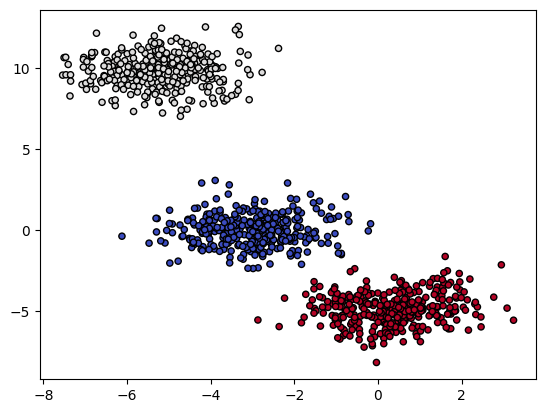

In [25]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [26]:
model = GaussianNB()
model.fit(X, y)

GaussianNB()

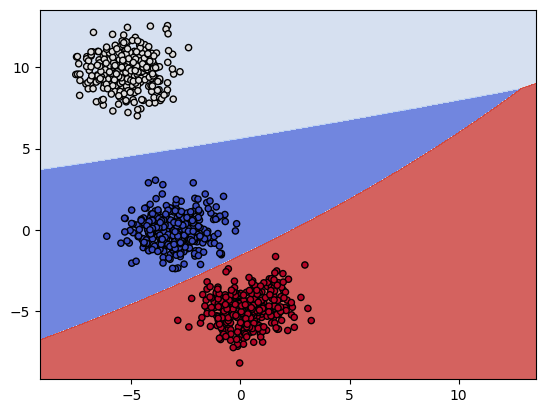

In [28]:
xx, yy = make_meshgrid(X[:, ], X[:, 1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

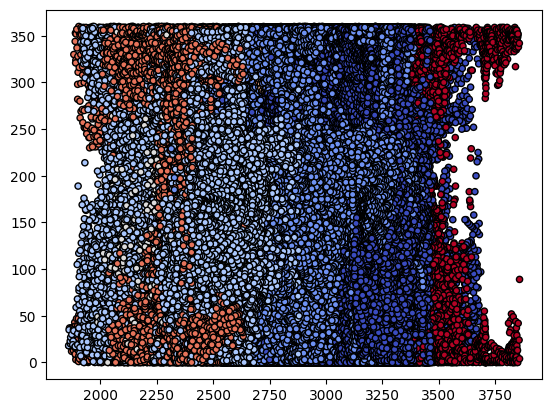

In [30]:
plt.scatter(covtype_X[:, 0], covtype_X[:, 1], c=covtype_y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');